[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HarisJafri-xcode/Python-for-DS/blob/main/07-Projects/Investigating_Netflix_Movies.ipynb)

# Problem Statement

Do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset netflix_data.csv, feel free to experiment further after submitting!

# Importing Relevant Data Science Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

# Analyze the Data Frame

In [45]:
file_path = 'https://raw.githubusercontent.com/HarisJafri-xcode/Python-for-DS/refs/heads/main/05-Datasets/netflix_dataset.csv'

In [46]:
df = pd.read_csv(file_path)

In [47]:
df.shape

(100, 12)

In [48]:
df.size

1200

In [49]:
df.ndim

2

# Information about DataFrame and DataSet

In [50]:
df.info() # Information about DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       100 non-null    object
 1   type          100 non-null    object
 2   title         100 non-null    object
 3   director      62 non-null     object
 4   cast          89 non-null     object
 5   country       60 non-null     object
 6   date_added    100 non-null    object
 7   release_year  100 non-null    int64 
 8   rating        100 non-null    object
 9   duration      100 non-null    object
 10  listed_in     100 non-null    object
 11  description   100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


"date_added" should also be datetime dtype and not object.

In [51]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [52]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       100 non-null    object        
 1   type          100 non-null    object        
 2   title         100 non-null    object        
 3   director      62 non-null     object        
 4   cast          89 non-null     object        
 5   country       60 non-null     object        
 6   date_added    100 non-null    datetime64[ns]
 7   release_year  100 non-null    int64         
 8   rating        100 non-null    object        
 9   duration      100 non-null    object        
 10  listed_in     100 non-null    object        
 11  description   100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 9.5+ KB


The 'date_added'  column has been successfully converted to datetime objects. You can see the updated data types above.

In [54]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# 90s Movie Era

In [57]:
mask_90s_movies = (df['release_year'] >= 1990) & (df['release_year'] <= 1999)
df_90s_movies = df[mask_90s_movies]
df_90s_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za..."


In [58]:
df_90s_movies.shape

(5, 12)

In [61]:
df_90s_movies_only = df_90s_movies[df_90s_movies['type'] == 'Movie']
df_90s_movies_only.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...


(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

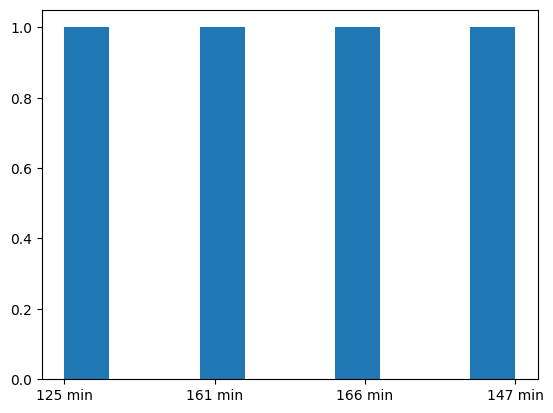

In [63]:
plt.hist(df_90s_movies_only['duration'])